In [371]:
# Import libraries

# for manipulation
import pandas as pd
import numpy as np 
import os

# for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.set_style("whitegrid")
colors  = ['#8BE8CB','#FF5E5B']

In [372]:
# Merging all data files 

files = [file for file in os.listdir('./data_cyclists')]
all_months_data = pd.DataFrame()

for file in files:
    df_file = pd.read_csv('./data_cyclists/' + file)
    all_months_data = pd.concat([all_months_data,df_file])

all_months_data.to_csv('all_data.csv', index = False)

In [373]:
# Importing data

df_raw = pd.read_csv('all_data.csv')
df_raw.head()

/Users/mattiacostola/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual


## Scenario
*** 

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of
marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Cyclistic bikes dierently. From these insights, your team
will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve
your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## The questions about this dataset:
*** 

How do annual members and casual riders use bikes differently? 




## Cleaning the data
***

In [374]:
# Info about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541683 entries, 0 to 3541682
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 351.3+ MB


In [375]:
# Drop unuseful columns
df_raw.drop(['start_lat','start_lng','end_lat','end_lng','start_station_id','end_station_id'],axis=1,inplace=True)

In [376]:
# Looking for duplicates
df_raw.duplicated().sum()

0

In [377]:
# Looking for null values
df_raw.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     94656
end_station_name      110881
member_casual              0
dtype: int64

In [378]:
# Looking at dataframe shape
df_raw.shape

(3541683, 7)

In [379]:
# Deleting rows with null values - about 3% of the data set
df_raw = df_raw.dropna(how='any')

In [380]:
# Checking result
df_raw.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
dtype: int64

In [381]:
# Looking at dataframe shape
df_raw.shape

(3390253, 7)

In [382]:
# Converting columns
df_raw.started_at = pd.to_datetime(df_raw.started_at)
df_raw.ended_at = pd.to_datetime(df_raw.ended_at)

In [383]:
# Adding columns
df_raw['trip'] = df_raw.start_station_name + ' To ' + df_raw.end_station_name
df_raw['trip_lenght'] = round((df_raw.ended_at - df_raw.started_at)/np.timedelta64(1,'m'),2)
df_raw['month'] = df_raw.started_at.dt.month
df_raw['dayofweek'] = df_raw.started_at.dt.dayofweek
df_raw['hour'] = df_raw.started_at.dt.hour
df_raw['name_day'] = df_raw.started_at.dt.day_name()

In [384]:
# Assigning the right order to day name in name_day column
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_raw['name_day'] = df_raw['name_day'].astype(cat_type)

In [385]:
# Checking result
df_raw.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,trip,trip_lenght,month,dayofweek,hour,name_day
113589,38680BB682F1EB70,electric_bike,2020-11-17 14:31:14,2020-11-17 14:33:36,State St & 33rd St,Calumet Ave & 33rd St,member,State St & 33rd St To Calumet Ave & 33rd St,2.37,11,1,14,Tuesday
2954958,C71FBF77A17E4991,docked_bike,2020-08-17 10:16:16,2020-08-17 10:22:12,Milwaukee Ave & Grand Ave,Clinton St & Lake St,member,Milwaukee Ave & Grand Ave To Clinton St & Lake St,5.93,8,0,10,Monday
2828608,2773A35723692957,docked_bike,2020-08-18 15:33:57,2020-08-18 16:16:02,California Ave & Fletcher St,Austin Blvd & Chicago Ave,casual,California Ave & Fletcher St To Austin Blvd & ...,42.08,8,1,15,Tuesday


In [386]:
# Deleting row with trip length < 0
df_raw = df_raw[df_raw['trip_lenght']>0]

In [387]:
# Creating a copy of the dataframe
df = df_raw.copy()

***
## **ANALYSIS**
***


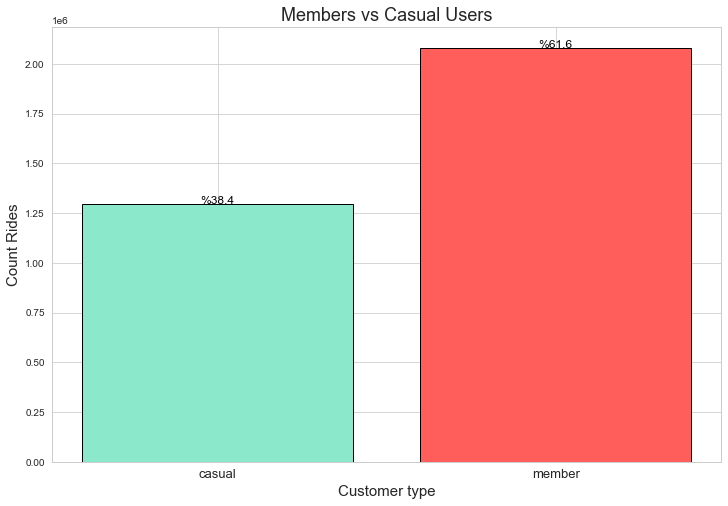

In [390]:
# Creating a bar chart to display Members vs Casual Users

members_count = df.groupby('member_casual').count()['ride_id']
total_count = df.member_casual.count()
index_members = members_count.index

plt.bar(index_members,members_count,color=colors,edgecolor='black',linewidth=1)
plt.xticks(index_members,rotation = '0', size = 13)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Customer type',size=15)
plt.title('Members vs Casual Users',size=18)

for k, v in members_count.items():
        plt.text (k, v, '%' + str(round((v/total_count*100),2)), fontsize = 12, rotation = 0, color = 'black', ha = 'center')
    

plt.show()

#### Note: 
About 62% of customers already have a year membership

***
## **QUESTION 1**
How do annual members and casual riders use bikes differently?
***

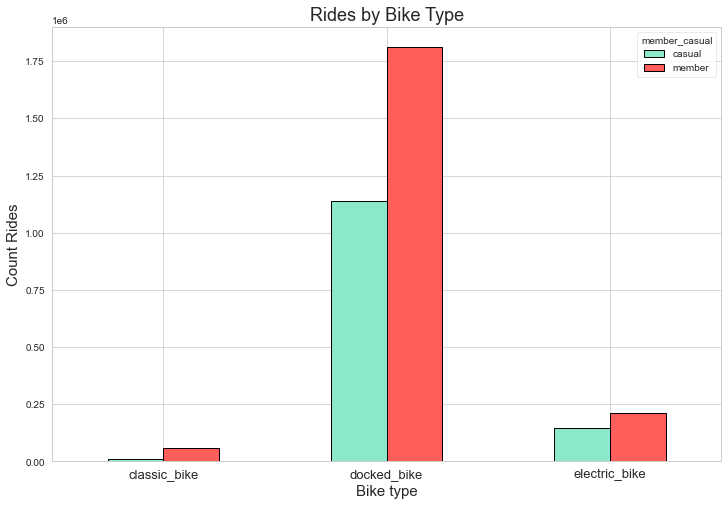

In [391]:
# Displaying what type of bikes customers use the most

bike_type_count = df.groupby(['rideable_type','member_casual']).count()['ride_id'].unstack().plot.bar(color=colors,edgecolor='black',linewidth=1)

plt.xticks(rotation = '0', size = 13)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Bike type',size=15)
plt.title('Rides by Bike Type',size=18)
plt.show()

***
#### Note: 
Both Member and Casual customers use more the 'docked_bike'
#### Limitation
We don't know how many electric-bike or classic-bike are available in comparison to the docked_bike
***

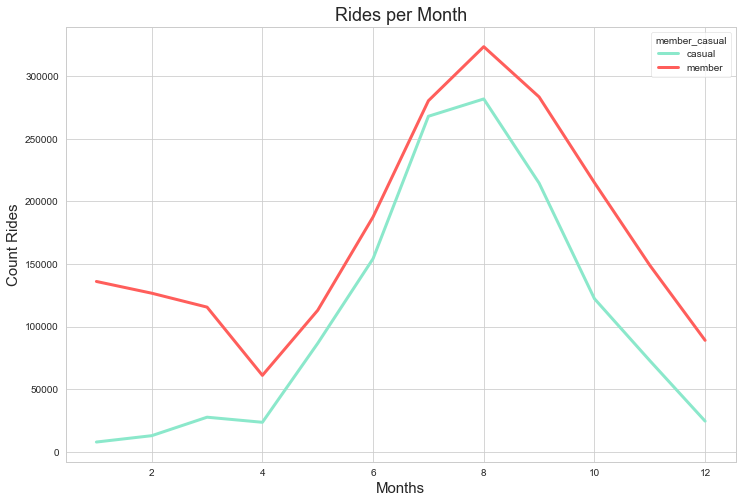

In [307]:
# Displaying the number of rides per months

df.groupby(['month','member_casual']).count()['ride_id'].unstack().plot(color=colors,lw=3)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Months',size=15)
plt.title('Rides per Month',size=18)
plt.show()

***
#### Note: 
As we can see from the plot above, during the summer season, the number of trips increased drastically. 

The creation of new seasonal membership could help to increase the number of members
***

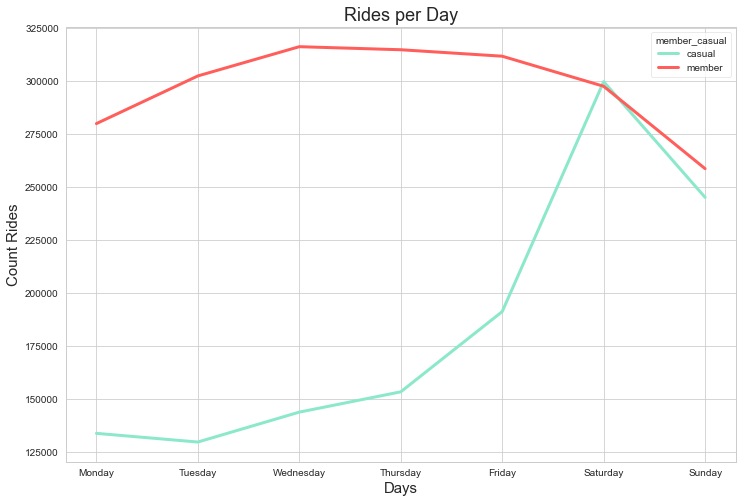

In [388]:
# Displaying the number of rides per day of the week

df.groupby(['name_day','member_casual']).count()['ride_id'].unstack().plot(color=colors,lw=3)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Days',size=15)
plt.title('Rides per Day',size=18)
plt.show()

***
#### Note: 
As we can see from the plot above, the number of rides from casual users doubles during the weekend; instead, the rides from members decrease respect the weekdays
***

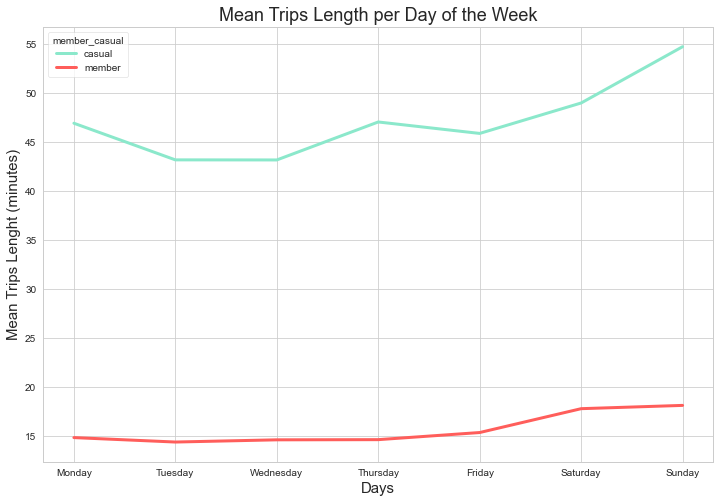

In [389]:
# Displaying the number of rides per day of the week

df.groupby(['name_day','member_casual']).mean()['trip_lenght'].unstack().plot(color=colors,lw=3)
plt.ylabel('Mean Trips Lenght (minutes)',size=15)
plt.xlabel('Days',size=15)
plt.title('Mean Trips Length per Day of the Week',size=18)
plt.show()

***
#### Note: 
From the plot above we can clearly see the difference in the length of the trips between casual users and members. Casual users tend to do longer trips linked to pleasure trips. Instead, members tend to do shorter trips connectable to trips between home/work
***

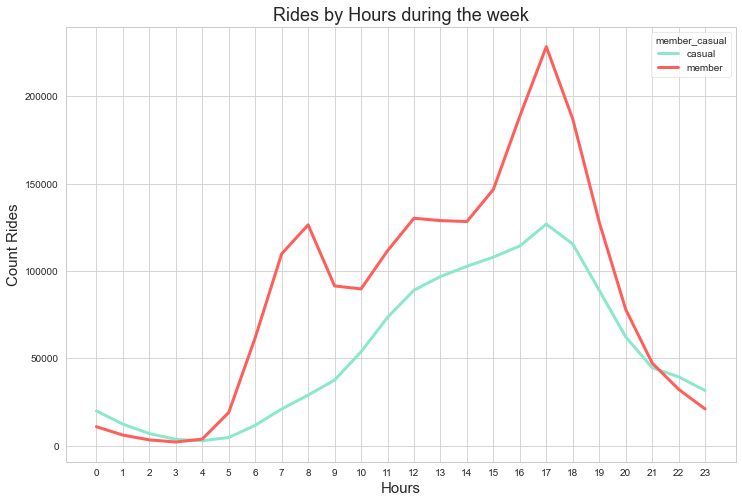

In [318]:
# Looking for peak hours of using the service

index = df.groupby('hour').count()['ride_id'].index
df.groupby(['hour','member_casual']).count()['ride_id'].unstack().plot(color=colors,lw=3)
plt.xticks(index)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Hours',size=15)
plt.title('Rides by Hours during the week',size=18)
plt.show()

***
#### Note: 
From the above plot, we can clearly see that around 7-8 am and 5 pm, members are using more of the service. These hours are linkable to the starting working hours and the finishing hours. Instead for the casual users, the use of the service grow steadily during the day till 5 pm
***

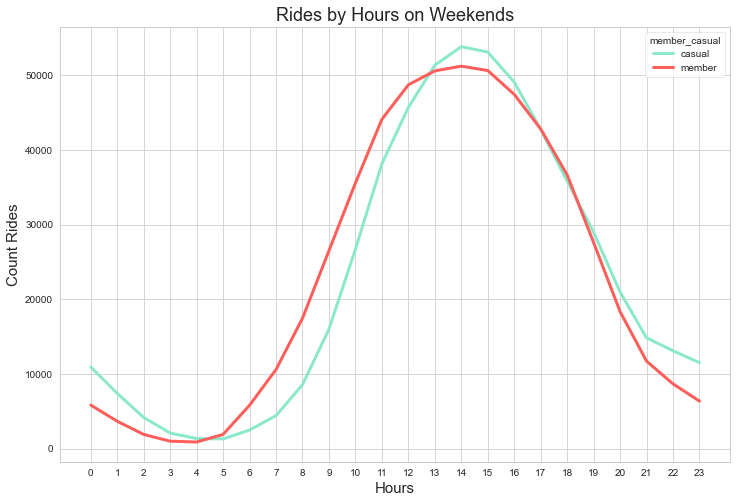

In [316]:
# Looking for peak hours of using the servises on Saturday and Sunday

df_we = df[df['dayofweek'] > 4]
index = df.groupby('hour').count()['ride_id'].index
df_we.groupby(['hour','member_casual']).count()['ride_id'].unstack().plot(color=colors,lw=3)
plt.xticks(index)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Hours',size=15)
plt.title('Rides by Hours on Weekends',size=18)
plt.show()

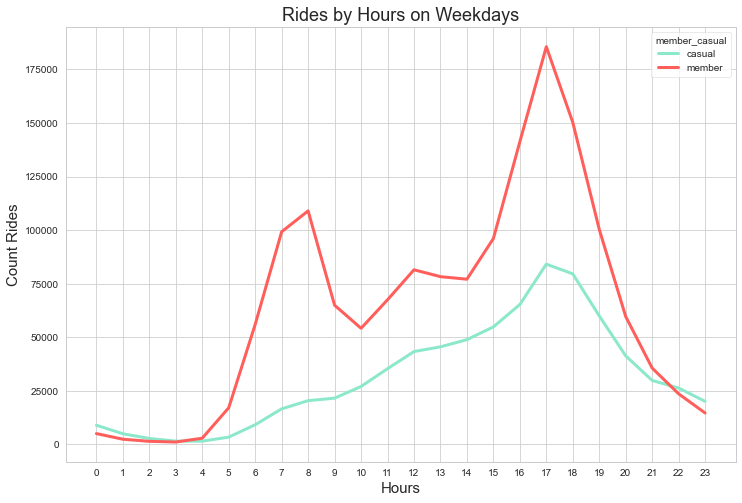

In [317]:
# Looking for peak hours of using the servises on weekdays

df_wd = df[df['dayofweek'] < 5]
index = df.groupby('hour').count()['ride_id'].index
df_wd.groupby(['hour','member_casual']).count()['ride_id'].unstack().plot(color=colors,lw=3)
plt.xticks(index)
plt.ylabel('Count Rides',size=15)
plt.xlabel('Hours',size=15)
plt.title('Rides by Hours on Weekdays',size=18)
plt.show()

## Answer Question 1
*** 
#### How do annual members and casual riders use bikes differently? 




- about 40% of rides were made by casual users
- during the summer season the number of rides has increased drastically both for members and casual users
- the number of rides made by cyclists without membership at weekends double respect the weekdays. Instead, the rides made by members decrease during the weekends.
- On average, the length of trips for casual users is three-time higher than the trips made by members
-  There are two peak hours around 7-8 am and 5 pm during the weekdays where the number of rides made by members is way higher than the rest of the day. Instead, the rides made by casual users grow steadily during the day till 5 pm without any peaks.
- During the weekends the demand for bikes are pretty similar both for non-members and members

We can conclude that most of the **annual members use the services to go to work** due to the fact they make more rides during the weekdays and **there are peaks of demands during the hours that match the beginning and the end of the work**. Also, rides made by annual members are on average shorter than the rides made by casual users.

On the other hand, **casual users tend to use the service way more during the weekends** with longer trips with an average of 47 minutes.**The number of rides made by casual riders increased 2 times during Saturday and Sunday** compared to weekdays.





#### Suggestion
To increase active users the company **could test a summer membership** pass to respond to the high demand for bikes that occurs in that season and also **could test a pass valid for only weekends**.